In [18]:
!pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install sympy

In [1]:
from sympy import symbols, latex, integrate, exp, sin, cos, tan, log, cot
from IPython.display import display, Math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import math

In [14]:
def menu_regla_integral():
    # Define las variables
    x, a, b = symbols('x a b')
    opcion_trig = 0
    # Solicita al usuario que ingrese el tipo de función
    print("Seleccione el tipo de función:")
    print("1. Polinómica")
    print("2. Exponencial")
    print("3. Trigonométrica")
    print("4. Logarítmica")
    opcion = int(input("Ingrese el número de la opción: "))

    if opcion == 1:
        # Solicita al usuario que ingrese los coeficientes de la función polinómica
        coeficientes = list(map(float, input("Ingrese los coeficientes de la función polinómica, separados por espacios (a0 + a1x + a2x^2 + ... + anx^n): ").split()))
        funcion = lambda x: sum(coef * x**i for i, coef in enumerate(coeficientes) if coef != 0)
        funcion_sympy = sum(coef * x**i for i, coef in enumerate(coeficientes) if coef != 0)
        funcion_np = np.vectorize(funcion)
        limit = 1
    elif opcion == 2:
        coef = float(input("Ingrese el coeficiente de la función exponencial (e^(coef*x)): "))
        funcion = lambda x: exp(coef * x)
        funcion_sympy = exp(coef * x)
        funcion_np = np.vectorize(lambda x: np.exp(coef * x))
        limit = 1
    elif opcion == 3:
        print("Seleccione la función trigonométrica:")
        print("1. Seno")
        print("2. Coseno")
        print("3. Tangente")
        print("4. Cotangente")
        opcion_trig = int(input("Ingrese el número de la opción: "))
        
        
        if opcion_trig == 1:
            funcion = lambda x: sin(x)
            funcion_sympy = sin(x)
            limit = 1
            funcion_np = np.vectorize(np.sin)
        elif opcion_trig == 2:
            funcion = lambda x: cos(x)
            funcion_sympy = cos(x)
            limit = 1
            funcion_np = np.vectorize(np.cos)
        elif opcion_trig == 3:
            funcion = lambda x: tan(x)
            funcion_sympy = tan(x)
            funcion_np = np.vectorize(np.tan)
            limit = 0
        elif opcion_trig == 4:
            funcion = lambda x: cot(x)
            funcion_sympy = cot(x)
            funcion_np = np.vectorize(lambda x: 1 / np.tan(x))
            limit = 0
            
    elif opcion == 4:
        funcion = lambda x: log(x)
        funcion_sympy = log(x)
        funcion_np = np.vectorize(np.log)
        limit = 1


    # Construye y muestra la representación de la cadena de la función
    display(Math(latex(funcion_sympy)))
    
    def simpson(f, a, b, n):
        if n % 2 != 0:
            print("El número de particiones para simpson debe ser par. Se incrementará en 1 al n.")
            n += 1
        h = (b - a) / n
        sum = f(a) + f(b)
        for i in range(1, n, 2):
            sum += 4 * f(a + i * h)
        for i in range(2, n - 1, 2):
            sum += 2 * f(a + i * h)
        return sum * h / 3

    def trapecio(f, a, b, n):
        h = (b - a) / n
        x = a + h
        suma = 0
        
        while x > a and x < b:
            suma += 2 * funcion(x)
            x += h
            
        return (h / 2) * (funcion(a) + funcion(b) + suma)
    #para tangente
    if opcion_trig == 3:
        
        while True:
            a_val = float(input("Ingrese el límite inferior (no puede ser de la forma (2n+1)*pi/2): "))
            
            if abs((a_val * 2 / math.pi) - round(a_val * 2 / math.pi)) > 0.001:
                break
            print("El límite inferior no puede ser de la forma (2n+1)*pi/2. Por favor, ingrese a nuevamente.")
            
        m = int(math.floor((a_val / math.pi - 1) / 2))
            
        # Calcular los límites del intervalo
        limite_superior = (2 * (m + 1) + 1) * math.pi / 2
        intervalo = f"({a_val}, {limite_superior})"
        
        while True:
            b_val = float(input(f"Ingrese el límite superior, este debe estar dentro del intervalo {intervalo}: "))
            if b_val < limite_superior:
                break
            print(f"El límite superior no puede superar {limite_superior}. Por favor, ingrese b nuevamente.")
    #Para cotangente
    elif opcion_trig == 4:
        
        while True:
            a_val = float(input("Ingrese el límite inferior (no puede ser de la forma n*pi): "))
            
            if abs((a_val/ math.pi) - round(a_val/ math.pi)) > 0.001:
                break
            print("El límite inferior no puede ser de la forma n*pi/2. Por favor, ingrese a nuevamente.")
            
        m = int(math.floor((a_val / math.pi)))
            
        # Calcular los límites del intervalo
        limite_superior = (m + 1)* math.pi
        intervalo = f"({a_val}, {limite_superior})"
       
        while True:
            b_val = float(input(f"Ingrese el límite superior, este debe estar dentro del intervalo {intervalo}: "))
            if b_val < limite_superior:
                break
            print(f"El límite superior no puede superar {limite_superior}. Por favor, ingrese b nuevamente.")      
    else:
        if opcion == 4:
            a_val = float(input("Ingrese el límite inferior: "))  
            while a_val < 0:
                print("El límite inferior debe ser mayor a 0, Por favor, ingrese a nuevamente.")
                a_val = float(input("Ingrese el límite inferior: "))
            b_val = float(input("Ingrese el límite superior: "))
            while b_val <= a_val:
                print("El límite superior debe ser mayor al límite inferior. Por favor, ingrese b nuevamente.")
                b_val = float(input("Ingrese el límite superior: "))
        else:
            a_val = float(input("Ingrese el límite inferior: "))  
            b_val = float(input("Ingrese el límite superior: "))
            while b_val <= a_val:
                print("El límite superior debe ser mayor al límite inferior. Por favor, ingrese b nuevamente.")
                b_val = float(input("Ingrese el límite superior: "))
        
    n = int(input("Ingrese el número de particiones: "))   
    result_simpson = simpson(funcion, a_val, b_val, n)
    result_trapecio = trapecio(funcion, a_val, b_val, n)
    
    # Calcula la integral
    integral = integrate(funcion_sympy, (x, str(a_val), str(b_val)))

    # Genera y muestra el código LaTeX
    integral_simpson = "\\ \\text{{Mediante simpson:}} \\int_{{{} }}^{{{} }} {} \\, dx \\thickapprox {} ".format(a_val, b_val, latex(funcion_sympy), result_simpson)
    display(Math(integral_simpson))

    integral_trapecio = "\\ \\text{{Mediante trapecio:}} \\int_{{{} }}^{{{} }} {} \\, dx \\thickapprox {} ".format(a_val, b_val, latex(funcion_sympy), result_trapecio)
    display(Math(integral_trapecio))
    
    integral_latex = "\\ \\text{{La integral definida:}}\\int_{{{} }}^{{{} }} {} \\, dx = {}".format(a_val, b_val, latex(funcion_sympy), latex(integral))
    display(Math(integral_latex))
    
    error_simpson = integral - result_simpson
    error_trapecio = integral - result_trapecio

    # Genera y muestra el código LaTeX para el error
    error_latex_sm = "\\ \\text{{El error mediante Simpson es:}} {}".format(latex(error_simpson))
    display(Math(error_latex_sm))
    
    error_latex_tp= "\\ \\text{{El error mediante Trapecio es:}} {}".format(latex(error_trapecio))
    display(Math(error_latex_tp))
    
    # Crea un plot de la función
    x_valsfunction = np.linspace(a_val - limit, b_val + limit, 10000)
    x_valsarea = np.linspace(a_val, b_val, 10000)
    y_valsfunction = funcion_np(x_valsfunction)
    y_valsarea = funcion_np(x_valsarea)

    # Crea el plot de la función
    plt.figure(figsize=(4, 3))
    plt.plot(x_valsfunction, y_valsfunction, label='f(x)', color='blue')
    plt.fill_between(x_valsarea, y_valsarea, color='skyblue', alpha=0.4)

    # Agrega líneas de eje en x=0 y y=0
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

    # Configura los límites del plot
    plt.xlim([a_val-1, b_val+1])
    plt.ylim([min(y_valsfunction), max(y_valsfunction)])

    # Configura las etiquetas y el título
    plt.xlabel('x', fontsize=14)
    plt.ylabel('f(x)', fontsize=14)
    plt.title('Área bajo la curva', fontsize=14)

    # Muestra la leyenda
    plt.legend()

    # Muestra el plot
    plt.show()

Seleccione el tipo de función:
1. Polinómica
2. Exponencial
3. Trigonométrica
4. Logarítmica
Ingrese el número de la opción: 4


<IPython.core.display.Math object>

Ingrese el límite inferior: -4
El límite inferior debe ser mayor a 0, Por favor, ingrese a nuevamente.
Ingrese el límite inferior: 3
Ingrese el límite superior: 12
Ingrese el número de particiones: 19
El número de particiones para simpson debe ser par. Se incrementará en 1 al n.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

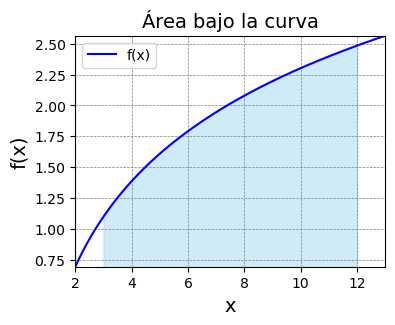

In [16]:
menu_regla_integral()